In [1]:
from PIL import Image, ImageFilter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from os.path import join
from colorharmony.cloth import load_colortable_as_dict
from scipy.spatial import distance
%matplotlib inline

In [21]:
image = Image.open(join("clothes_images", "1006771_14796_7.jpg"))

In [22]:
x_size = 64*4
y_size = 92*4
N = 4

In [23]:
image_threshold = image.convert(mode="L").point(lambda i: i < 245 and 255)
image.putalpha(image_threshold)
image = image.resize((x_size, y_size), Image.LANCZOS)
image.show()

In [24]:
image_data = np.array(image.getdata())
image_data.shape

(94208, 4)

In [25]:
kmeans = KMeans(n_clusters=N, random_state=101).fit(image_data)

In [26]:
kmeans.cluster_centers_

array([[2.34471391e+02, 2.36381903e+02, 2.36104125e+02, 3.00918164e+01],
       [6.58229303e+01, 9.51156547e+01, 9.23145773e+01, 2.54796061e+02],
       [1.65132820e-01, 2.18397073e-01, 2.06376258e-01, 1.17708547e-02],
       [1.54814594e+02, 1.66712584e+02, 1.64494415e+02, 2.08793745e+02]])

In [27]:
cluster_centers_rounded = np.vectorize(lambda x: x/255)(kmeans.cluster_centers_)

In [28]:
colorname_dict = load_colortable_as_dict()

In [29]:
colors_count = {colorname_dict[tuple(center[:-1])]: sum(kmeans.labels_ == i) for i,center in enumerate(kmeans.cluster_centers_) 
     if center[-1] > 200}
colors_count

{'dark slate gray': 45856, 'cool grey': 1339}

In [30]:
total_pixels = sum(colors_count.values())

In [31]:
[cc/total_pixels for cc in colors_count.values()]

[0.9716283504608539, 0.028371649539146095]

In [32]:
image_clustered = np.reshape(np.array([cluster_centers_rounded[label] for label in kmeans.labels_]), 
                             newshape=(y_size, x_size,4))

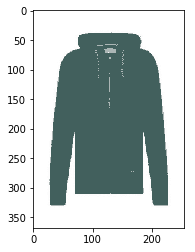

In [33]:
plt.imshow(image_clustered)

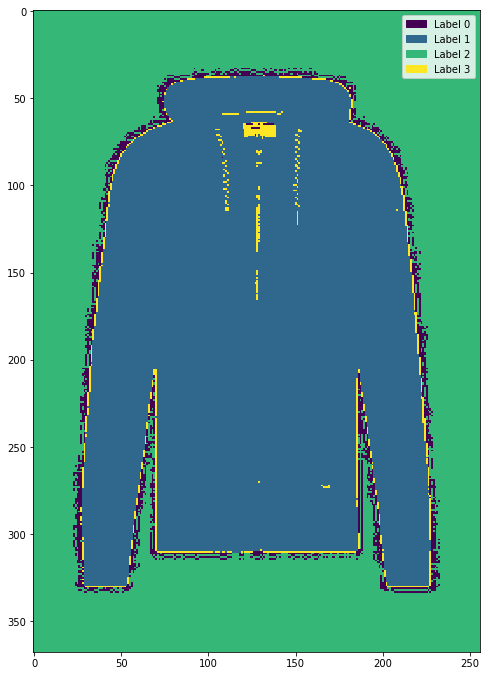

In [34]:
plt.figure(figsize=(8,12))
im = plt.imshow(np.reshape(kmeans.labels_, newshape=(y_size, x_size)))
colors = [ im.cmap(im.norm(value)) for value in range(N)]
patches = [mpatches.Patch(color=colors[i], label="Label {}".format(i)) for i in range(N)]
plt.legend(handles=patches)

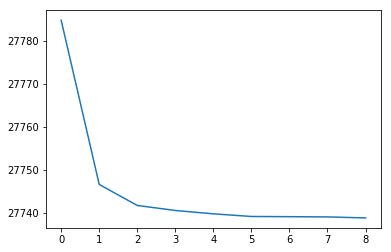

In [164]:
error = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=101).fit(image_data)
    cluster_centers_rounded = np.vectorize(lambda x: x/255)(kmeans.cluster_centers_)
    image_clustered = np.array([cluster_centers_rounded[label] for label in kmeans.labels_])
    error.append(np.linalg.norm(image_data[:,:-1]-image_clustered[:,:-1]))
    
plt.plot(error)